<a href="https://colab.research.google.com/github/rishik-00/Dog-Breed-Identification/blob/master/Dog_Breed_original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Dog Breed Classification

This notebook builds an image classifier using Tensorflow 2.0 and TensorFlow hub

## 1. Problem 
Identifying the breed of dog given an image of a dog

## 2. Data

The data is from kaggle's dog breed identification competition
https://www.kaggle.com/c/dog-breed-identification

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image
https://www.kaggle.com/c/dog-breed-identification/overview/evaluation
## 4. Features

* Data is images (unstructured data), so using deep learning
* There are 120 breeds which  means 120 different classes

In [0]:
#!unzip "/content/drive/My Drive/Dog-Breed/dog-breed-identification.zip" -d "drive/My Drive/Dog-Breed/"

In [0]:
import tensorflow as tf
print('TF version', tf.__version__)

TF version 2.2.0-rc3


In [0]:
import tensorflow_hub as hub
print('TF hub version', hub.__version__)

#Check for GPU availability
print('GPU', 'available' if tf.config.list_physical_devices('GPU') else 'not available')

TF hub version 0.8.0
GPU available


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Loading a data (turning in tensors)
Turning our images into tensors numerical representation

In [0]:
import pandas as pd
label_csv = pd.read_csv('/content/drive/My Drive/Dog-Breed/dog-breed-identification/labels.csv')
print(label_csv.describe())
label_csv.head()

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     36b6be29fc246ceb52d58ab01584773e  scottish_deerhound
freq                                   1                 126


id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

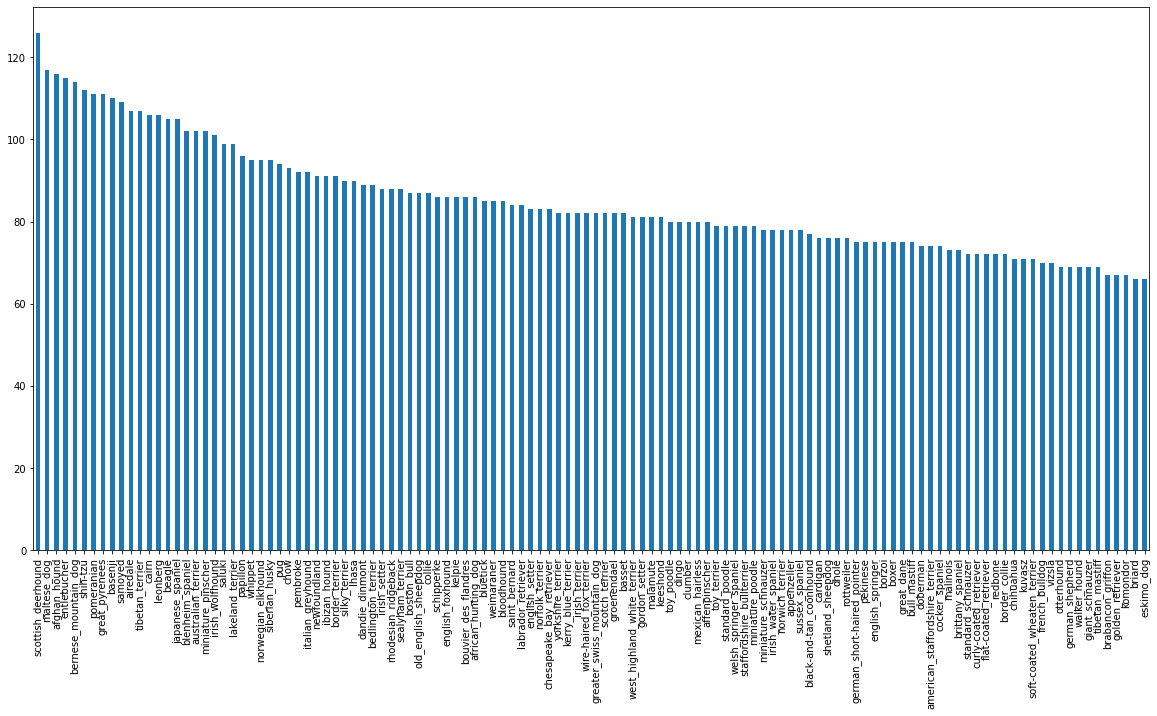

In [0]:
label_csv.breed.value_counts().plot.bar(figsize = (20, 10))

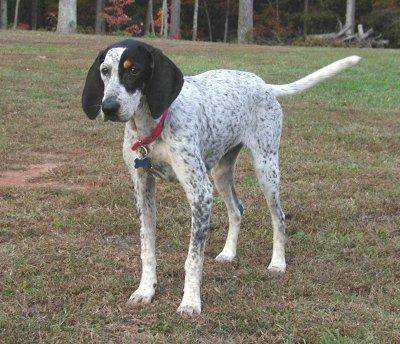

In [0]:
# Viewing an Image
from IPython.display import Image
Image('/content/drive/My Drive/Dog-Breed/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

### Getting Images and Labels

Get a list of all image file pathname

In [0]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [0]:
#Create Path name for Image Id's
filename = ['drive/My Drive/Dog-Breed/dog-breed-identification/train/' + fname + '.jpg' for fname in label_csv['id']]

In [0]:
filename[:10]

['drive/My Drive/Dog-Breed/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [0]:
import os
if len(os.listdir('drive/My Drive/Dog-Breed/dog-breed-identification/train')) == len(filename):
  print('Filenames match')
else:
  print('Data doesnt match')

Filenames match


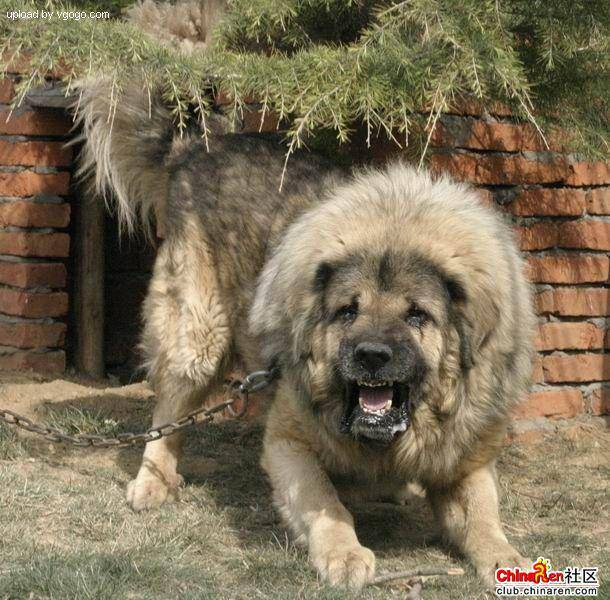

In [0]:
Image(filename[9000])

In [0]:
import numpy as np
labels = label_csv.breed.to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [0]:
# See if number of labels equals to the number of filenames
if len(labels) == len(filename):
  print('matches')
else:
  print('Doesnt matches, contain missing values')

matches


In [0]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [0]:
# Turn every label into boolean label
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [0]:
len(boolean_labels)

10222

In [0]:
print(labels[0])

boston_bull


In [0]:
#  Turning Boolean array into integers
print(labels[0]) #  original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be  a  1 where sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


  ### Creating a validation set

In [0]:
# Setup x and y variables
x = filename
y = boolean_labels

We're going to start off with 1000 images and increase as needed

In [0]:
# Set number of images to use for experimenting
  NUM_IMAGES = 1000 # @param {type: 'slider', min: 1000, max: 10000, step: 1000}

In [0]:
from sklearn.model_selection import train_test_split

# Split into training and validation set of total size  =  NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42 )

len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

## Preprocessing Images (Turning Images into tensors)

In [0]:
# Convert imsge into numpy array
from matplotlib.pyplot import imread
image = imread(filename[765])
image.shape

(225, 139, 3)

In [0]:
image[:3]

array([[[136, 112, 102],
        [130, 112, 100],
        [127, 120, 104],
        ...,
        [137, 112,  81],
        [150, 125,  94],
        [158, 133, 102]],

       [[148, 126, 115],
        [139, 123, 110],
        [131, 125, 109],
        ...,
        [138, 113,  82],
        [147, 122,  91],
        [152, 127,  96]],

       [[138, 118, 107],
        [130, 116, 103],
        [125, 119, 103],
        ...,
        [151, 126,  95],
        [155, 130,  99],
        [155, 130,  99]]], dtype=uint8)

In [0]:
tf.constant(image)[:3]  
# Only difference is it's a tensor object and image is a numpy array

<tf.Tensor: shape=(3, 139, 3), dtype=uint8, numpy=
array([[[136, 112, 102],
        [130, 112, 100],
        [127, 120, 104],
        ...,
        [137, 112,  81],
        [150, 125,  94],
        [158, 133, 102]],

       [[148, 126, 115],
        [139, 123, 110],
        [131, 125, 109],
        ...,
        [138, 113,  82],
        [147, 122,  91],
        [152, 127,  96]],

       [[138, 118, 107],
        [130, 116, 103],
        [125, 119, 103],
        ...,
        [151, 126,  95],
        [155, 130,  99],
        [155, 130,  99]]], dtype=uint8)>

1. Take an image filepath as input
2. Read the file and save it to a variable `image`
3. Turn `image` into tensors
4. Normalize our image, convert color channel to 0-1 from 0-255
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

In [0]:
IMG_SIZE = 224

# Create a function for preprocessing images
def process_img(image_path, IMG_SIZE = IMG_SIZE):
  """
  Takes a image file path and turns into tensor
  """
  # Read in an image file
  image  = tf.io.read_file(image_path) #Turn content into tensor, and it will read the filepath as an image
  # Turn the jpg image into numerical tensors with 3 color channels (RBG)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel value from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32) #Normalisation
  # Resize the image
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])
  
  return image

## Turning into batches

Taking a small portion of max 32 images and then figure out pattern and then take another batch.... because they all not might fit into memory

In order to use tensor flow effectively, we need our data in form of tensor tuples which look like this:
`(image, label)`

In [0]:
#Create a function to return tensor tuples
def get_image_label(image_path, label):

  image = process_img(image_path)
  return image, label


In [0]:
(process_img(x[42]), tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Make a function to make  our data `x` and `y` into batches

In [0]:
  BATCH_SIZE = 32

  def create_data_batches(x, y = None, batch_size = BATCH_SIZE, valid_data  = False, test_data = False):
    """
    Create a batches of data out of x and y
    Shuffles the data if it's a training set, doesn't shuffle if it's a validation set
    Also accepts test data as input
    """
    # For test data set
    if test_data:
      print('Test batches....' )
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #Only filepaths,no labels, Convert the tensors into datasets
      data_batch = data.map(process_img).batch(BATCH_SIZE)

      return data_batch

    # For a valid data set
    elif valid_data:
      print('Validation set batches...')
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x),     # File paths
                                                 tf.constant(y)))    # Labels
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)

      return data_batch

    else:
      print('Training set batches....')
      data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                 tf.constant(y)))
      #Shuffling filename and labels
      data = data.shuffle(buffer_size = len(x))

      #Create image(preprocessed) , label tuples
      data_batch = data.map(get_image_label).batch(BATCH_SIZE)

      return data_batch

In [0]:
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Training set batches....
Validation set batches...


In [0]:
# Checkout the attributes of data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  plt.figure(figsize = (10,10))
  for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[2.7485996e-01, 2.9054624e-01, 2.0035017e-01],
          [2.9922229e-01, 3.1490856e-01, 2.2471248e-01],
          [2.7359897e-01, 2.8928524e-01, 1.9908918e-01],
          ...,
          [3.8103119e-01, 4.2024687e-01, 3.8887432e-01],
          [3.6319146e-01, 4.1203612e-01, 3.9575458e-01],
          [3.5653886e-01, 4.1536242e-01, 3.9575458e-01]],
 
         [[2.2368902e-01, 2.3840366e-01, 1.5015085e-01],
          [2.6005778e-01, 2.7477241e-01, 1.8651962e-01],
          [2.6115197e-01, 2.7586663e-01, 1.8761382e-01],
          ...,
          [3.8649407e-01, 4.2570975e-01, 3.9433721e-01],
          [3.5862213e-01, 4.0746680e-01, 3.9118525e-01],
          [3.5196954e-01, 4.1079310e-01, 3.9118525e-01]],
 
         [[2.0164591e-01, 2.1341062e-01, 1.3105766e-01],
          [2.2614884e-01, 2.3791355e-01, 1.5556060e-01],
          [2.3036709e-01, 2.4213180e-01, 1.5977885e-01],
          ...,
          [3.9228702e-01, 4.3150270e-01, 4.0013015e-01],
          [3.5567221e-01, 4.0451688e-

In [0]:
len(train_images), len(train_labels)

(32, 32)

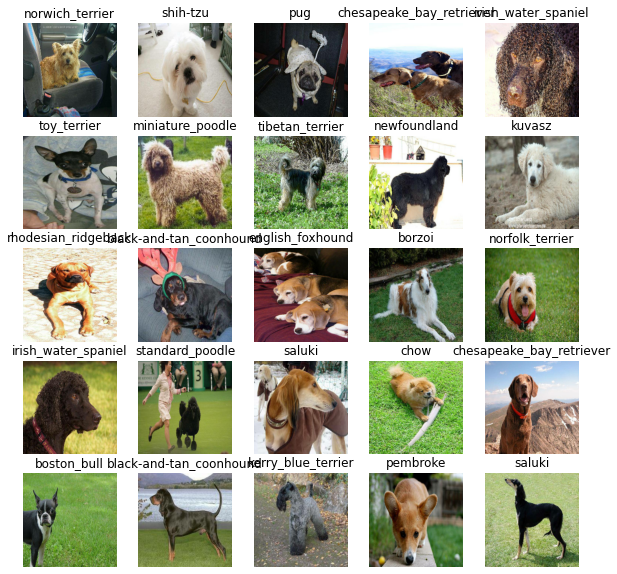

In [0]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

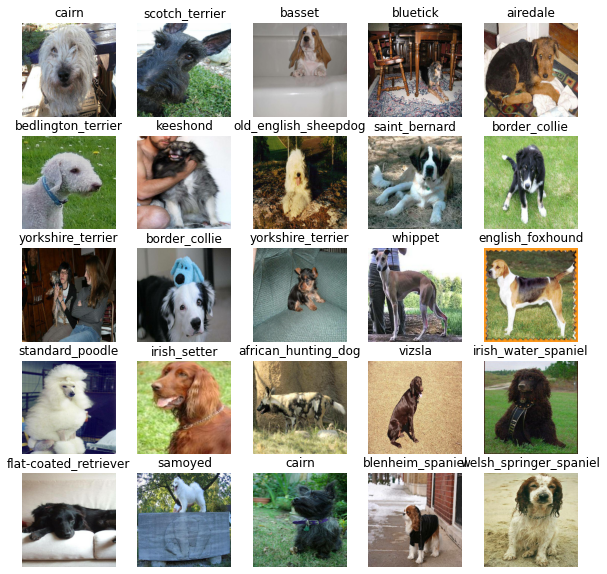

In [0]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model

* The input shape (in form of Tensors) to our model
* The output shape (in form of  tensors) to our  model
* The URL of the model we want to use from tensorflow hub https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4

In [0]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] #batch, height, width, color channels

#Setup output shape
OUTPUT_SHAPE = len(unique_breeds)

#Setup model URL from TensorFlow hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4' 


 A function which
 * Takes the input shapes, output shapes and the model
 * Defines the layers in keras in sequential methods
 * Compiles the model
 * Builds the model
 * Returns the model

In [0]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building model with :', model_url)

  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), #Layer 1(input layer)
    tf.keras.layers.Dense(units  = OUTPUT_SHAPE,
                          activation = 'softmax') #Layer 2(output Layer)
  ])

  #Compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  #Build the model
  model.build(INPUT_SHAPE)

  return  model

In [0]:
model = create_model()
model.summary()

Building mpodel with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


###  Creating Callbacks
Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving

1. TensorBoard = track model progress
2. Early stopping = prevents to train for too long

In [0]:
# TensorBoard
%load_ext tensorboard

In [0]:
import datetime
from pytz import timezone

def create_tensor_callback():
  #Create a log directory for storing tensorboard logs
  logdir = os.path.join('drive/My Drive/Dog-Breed/dog-breed-identification/logs',
                        datetime.datetime.now(timezone('Asia/Kolkata')).strftime('%Y-%m-%d<>%H:%M:%S'))
  
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
#Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                  patience = 3)

## Training a model (on subset of data)

In [0]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max: 100, step:10}

In [0]:
def train_model():
  model = create_model()

  #Create a tensorboard session everytime we train a model
  tensorboard = create_tensor_callback()

  #Fit the model to data and passing callbacks
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  
  return model

In [0]:
model  = train_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 467s 19s/step - loss: 4.5480 - accuracy: 0.0913 - val_loss: 3.4338 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 6s 223ms/step - loss: 1.6269 - accuracy: 0.6975 - val_loss: 2.1629 - val_accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 6s 225ms/step - loss: 0.5593 - accuracy: 0.9350 - val_loss: 1.6668 - val_accuracy: 0.6150
Epoch 4/100
25/25 [==============================] - 6s 227ms/step - loss: 0.2540 - accuracy: 0.9900 - val_loss: 1.4817 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 6s 226ms/step - loss: 0.1482 - accuracy: 0.9975 - val_loss: 1.4093 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 6s 227ms/step - loss: 0.1008 - accuracy: 0.9987 - val_loss: 1.3624 - val_accuracy: 0.6650
Epoch 7/100
25/25 [=============================

### Checking the TensorBooard Logs

The tensorboard magic function (`%tensorboard`) will access the log directory and visualize its content

In [0]:
%tensorboard --logdir drive/My\ Drive/Dog-Breed/dog-breed-identification/logs

In [0]:
# Make predictions on validation data
preds = model.predict(val_data, verbose = 1)
preds

7/7 [==============================] - 1s 145ms/step


array([[1.54987603e-04, 7.80662594e-05, 9.56944015e-04, ...,
        1.11759196e-04, 5.58575157e-05, 1.57979061e-03],
       [1.50972302e-03, 1.46855530e-03, 6.51967479e-03, ...,
        1.27056276e-03, 7.81983137e-04, 1.23585007e-04],
       [3.23693857e-05, 4.71693602e-05, 1.71897100e-05, ...,
        1.11969021e-05, 1.10944507e-04, 2.22339688e-04],
       ...,
       [9.32987095e-05, 1.35899856e-04, 1.46493490e-04, ...,
        4.06736071e-05, 8.30684148e-04, 3.73535404e-05],
       [5.52511541e-03, 1.03917446e-04, 4.67311766e-04, ...,
        3.08453418e-05, 3.96736468e-05, 1.46832876e-02],
       [1.03263196e-03, 7.13200716e-05, 2.91824597e-03, ...,
        7.03565916e-03, 7.17191305e-03, 2.50331195e-05]], dtype=float32)

In [0]:
preds.shape

(200, 120)

In [0]:
#First Prediction, prediction probabilities are also known as confidence levels
index = 0
print(preds[index])
print(f'Max Value (probability of prediction): {np.max(preds[index])}')
print(f'Sum : {np.sum(preds[index])}')
print(f'Max Index : {np.argmax(preds[index])}')
print(f'Predicted Label: {unique_breeds[np.argmax(preds[index])]}')

[1.54987603e-04 7.80662594e-05 9.56944015e-04 7.82213392e-05
 9.71762493e-05 2.26876058e-04 3.10987681e-02 1.63436460e-03
 1.71649255e-04 1.05105661e-04 2.26319826e-04 4.28024330e-04
 5.71517390e-04 1.61266784e-04 2.50466983e-04 1.01797353e-03
 9.45476058e-05 5.05283363e-02 2.32181737e-05 7.36484872e-05
 1.61506410e-03 2.11033373e-04 8.78438514e-05 1.33196113e-03
 1.04071669e-05 4.87516190e-05 4.29680109e-01 1.25961145e-04
 1.95809960e-04 3.86328320e-04 1.48727791e-04 7.34716130e-04
 4.22171375e-04 3.82379330e-05 1.34070491e-04 9.13456827e-03
 6.10504067e-05 7.32945453e-04 1.09889676e-04 1.53010755e-04
 7.19552627e-04 7.33399975e-06 3.58126999e-04 8.54523241e-05
 3.05557369e-05 9.83250138e-05 5.50420409e-05 9.24509077e-05
 5.66423929e-04 3.08884555e-05 2.23140858e-04 1.78453029e-05
 2.82380759e-04 1.03524108e-04 1.97582805e-04 1.97669124e-05
 1.64542158e-04 3.41875525e-03 2.89533433e-04 2.03162879e-01
 2.61187030e-04 2.37663753e-05 2.16249027e-03 4.30250439e-05
 5.52035170e-04 4.637962

In [0]:
def get_pred_label(preds_probabilities):
  """
  Turns an array of prediciton probabilities into labels
  """
  return unique_breeds[np.argmax(preds_probabilities)]

pred_label = get_pred_label(preds[55])
pred_label

'affenpinscher'

Unbatching data to make predictionson the vallidation data set and compare those with truth labels

In [0]:
def unbatchify(data):
  """
  Takes a batch data set of (image, label) Tensors and return a separate list of images and labels
  """
  images =[]
  labels = []

  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

#Unbatchifying the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
get_pred_label(val_labels[0])

'cairn'

In [0]:
def plot_pred(prediction_probabilities, labels, images, n =1):
   """
   View the prediction, truth label and image for sample n
   """
   pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

   #Get the pred label
   pred_label = get_pred_label(pred_prob)

   #Plot image and remove ticks
   plt.imshow(image)
   plt.xticks([])
   plt.yticks([])
   
   if pred_label == true_label:
     color = 'green'
   else: color = 'red'
   #Change  plot title to be predicted, probability of prediction and truth label

   plt.title('{} {:2.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                     color = color)

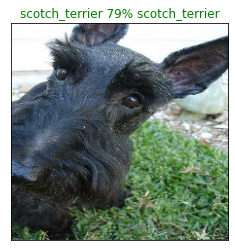

In [0]:
plot_pred(prediction_probabilities=preds,
          labels = val_labels,
          images = val_images,
          n = 1)

In [0]:
def plot_top_pred(prediction_probabilities, labels, n = 1):
  """
  Plot the top 10 highest predcition for this model
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  pred_label = get_pred_label(pred_prob)

  # Find the top10 predictions indexes
  top_10_pred_index = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 predictions values
  top_10_pred_values = pred_prob[top_10_pred_index]
  #  Find the top 10 predictions labels
  top_10_pred_labels = unique_breeds[top_10_pred_index]
  
  #plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation= 'vertical')
  
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

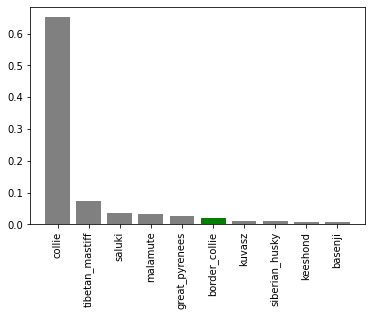

In [0]:
plot_top_pred(prediction_probabilities= preds,
              labels = val_labels,
              n = 9)

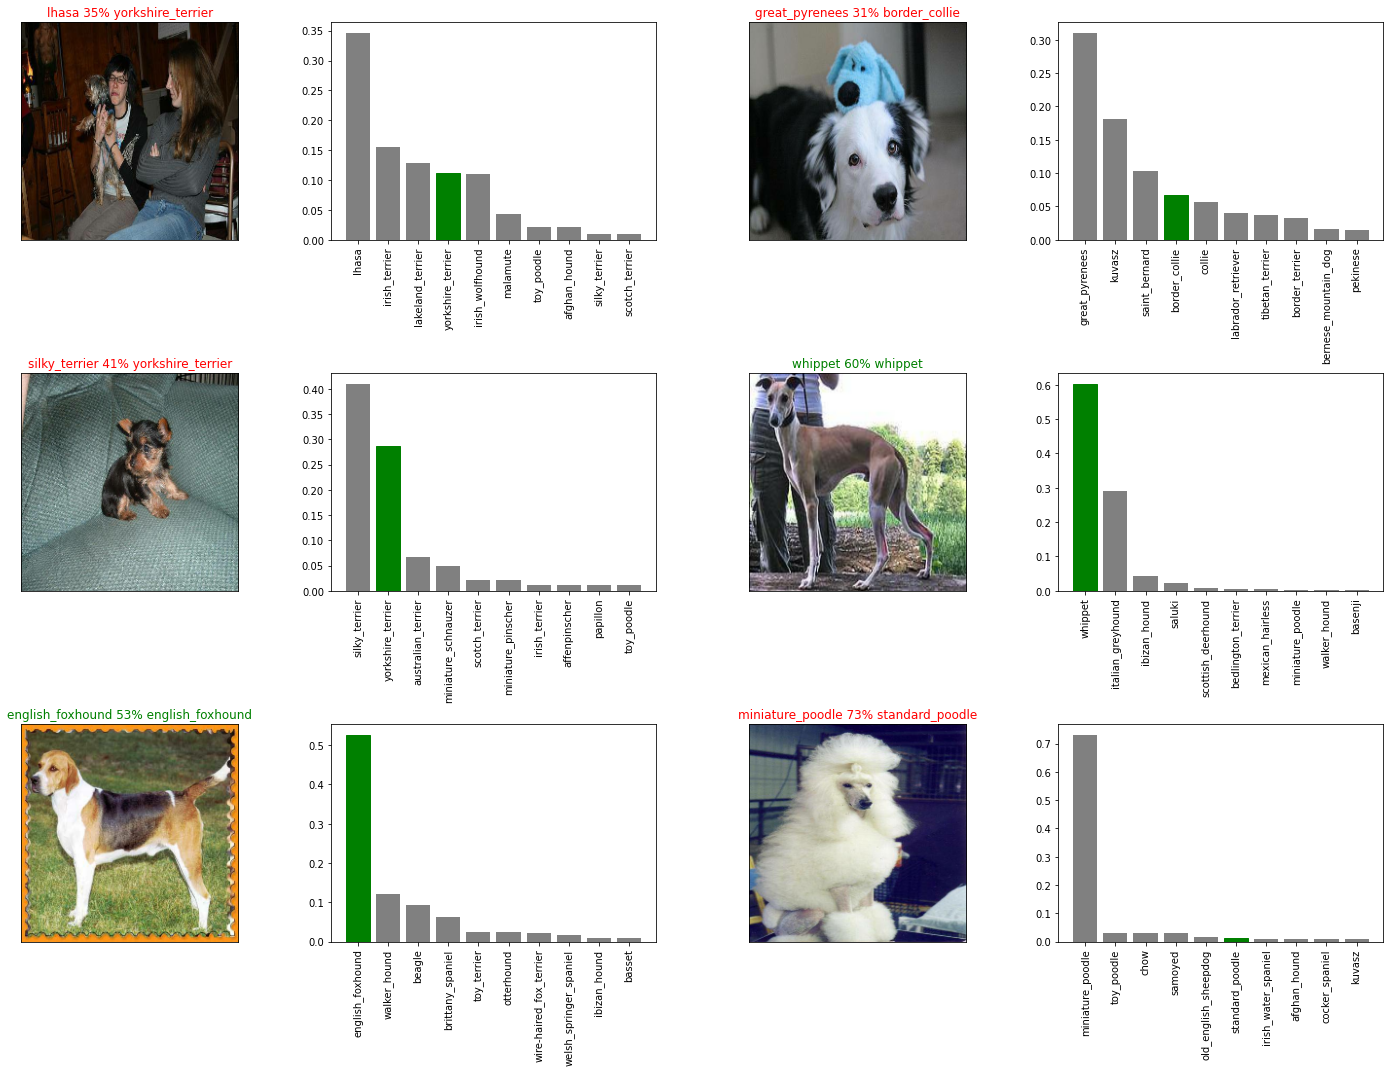

In [0]:
i_multiplier =10
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=preds,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_top_pred(prediction_probabilities= preds,
                labels = val_labels,
                n = i+i_multiplier)

plt.tight_layout(h_pad = 1.0)  
plt.show()

## Saving and  reloading a model

In [0]:
from pytz import timezone
def save_model(model, suffix = None):
  
  modeldir = os.path.join('drive/My Drive/Dog-Breed/dog-breed-identification/models',
                          datetime.datetime.now(timezone('Asia/Kolkata')).strftime('%Y%m%d:%H%M%S'))
  
  model_path = modeldir + '-' + suffix + '.h5' #save in .h5 format
  print(f'Saving model to: {model_path}...')
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  
  print(f'Loading saved model from {model_path}...')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {'KerasLayer':hub.KerasLayer})
  return  model

In [0]:
save_model(model, suffix = '1000-images-mobilenetv2-Adam')

Saving model to: drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:191852-1000-images-mobilenetv2-Adam.h5...


'drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:191852-1000-images-mobilenetv2-Adam.h5'

## Training a model on full data

In [0]:
# Create a data batch with full data
full_data = create_data_batches(x, y)

Training set batches....


In [0]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [0]:
full_model = create_model()

Building model with : https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
# Create full model callbacks\
full_model_tensorboard = create_tensor_callback()
#No validation set when training on all the data, so we can't monitor val accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                   patience = 3)

In [0]:
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 4784s 15s/step - loss: 1.3332 - accuracy: 0.6706
Epoch 2/100
320/320 [==============================] - 61s 190ms/step - loss: 0.3966 - accuracy: 0.8824
Epoch 3/100
320/320 [==============================] - 61s 190ms/step - loss: 0.2320 - accuracy: 0.9389
Epoch 4/100
320/320 [==============================] - 60s 188ms/step - loss: 0.1539 - accuracy: 0.9636
Epoch 5/100
320/320 [==============================] - 60s 188ms/step - loss: 0.1049 - accuracy: 0.9790
Epoch 6/100
320/320 [==============================] - 60s 187ms/step - loss: 0.0780 - accuracy: 0.9868
Epoch 7/100
320/320 [==============================] - 61s 190ms/step - loss: 0.0585 - accuracy: 0.9912
Epoch 8/100
320/320 [==============================] - 61s 190ms/step - loss: 0.0452 - accuracy: 0.9949
Epoch 9/100
320/320 [==============================] - 59s 185ms/step - loss: 0.0372 - accuracy: 0.9958
Epoch 10/100
320/320 [==============================] - 60s 186m

In [0]:
save_model(full_model, suffix = 'full-data-mobilenetv2')

Saving model to: drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:205828-full-data-mobilenetv2.h5...


'drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:205828-full-data-mobilenetv2.h5'

In [0]:
loaded_full_model = load_model('drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:205828-full-data-mobilenetv2.h5')

Loading saved model from drive/My Drive/Dog-Breed/dog-breed-identification/models/20200421:205828-full-data-mobilenetv2.h5...


### Making predictions on test dataset

In [0]:
test_path = 'drive/My Drive/Dog-Breed/dog-breed-identification/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/My Drive/Dog-Breed/dog-breed-identification/test/e6326f6c8ad1e06c0f70546ddfc64067.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e4607de37fdda1509487e042b6ca309a.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e6a5c18da7beedb1622bf7d18b452121.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e4819d4934cad3c74896ebbf60df595a.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e7dc8cc599049ea9fa2a172c88646c57.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/dd703c7beeaf5cba5533d5f42b608f2e.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/dfc5d207b533d381045984a0a0adb23c.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e3cfadb2543190f43da6bb5500c75578.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e2c0a9f66153b81eb27bb1bceb8c18dd.jpg',
 'drive/My Drive/Dog-Breed/dog-breed-identification/test/e732916519751eaa0cb2ba0cc1217ab9.jpg']

In [0]:
test_data = create_data_batches(test_filenames, test_data = True)

Test batches....


In [0]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [0]:
# Make predictions on test data batch using full model
test_preds = full_model.predict(test_data,
                                verbose =1)

324/324 [==============================] - 5289s 16s/step


In [0]:
# Save predictions to csv file
np.savetxt('drive/My Drive/Dog-Breed/preds-array.csv', test_preds, delimiter = ',')

In [0]:
# For loading
test_preds = np.loadtxt('drive/My Drive/Dog-Breed/preds-array.csv', delimiter = ',')

In [0]:
test_preds[:10]

array([[1.83803406e-09, 3.27059388e-04, 3.44984574e-09, ...,
        1.51130022e-03, 2.19677296e-03, 1.77709830e-06],
       [2.06593020e-10, 7.44102469e-09, 3.76039822e-09, ...,
        1.58443228e-07, 4.22821955e-09, 7.47029389e-08],
       [1.50482415e-09, 1.12516965e-08, 1.33907985e-09, ...,
        2.32510500e-09, 2.32735345e-10, 6.41293063e-09],
       ...,
       [1.74245008e-06, 7.56254712e-11, 3.11554032e-07, ...,
        1.83345836e-08, 2.97590191e-07, 1.36892218e-03],
       [3.86128818e-09, 5.79095776e-08, 7.48837969e-09, ...,
        2.56110155e-07, 2.84860929e-04, 2.76186341e-07],
       [1.73870363e-09, 2.01342915e-10, 2.33539924e-11, ...,
        3.22053079e-11, 3.04875486e-10, 1.78386550e-08]])

In [0]:
# preparing test data set preds for kaggle
preds_df = pd.DataFrame(columns = ['id'] + list(unique_breeds))

In [0]:
# We have to put id's in id column by extracting fromm test dataset
#  this will seperate the last bit of the string and last is "jpg", so we take seconf last which is also the first "label.jpg"
test_id = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
test_id[:5]

['e6326f6c8ad1e06c0f70546ddfc64067',
 'e4607de37fdda1509487e042b6ca309a',
 'e6a5c18da7beedb1622bf7d18b452121',
 'e4819d4934cad3c74896ebbf60df595a',
 'e7dc8cc599049ea9fa2a172c88646c57']

In [0]:
preds_df['id'] = test_id
preds_df.head()

id  ... yorkshire_terrier
0  e6326f6c8ad1e06c0f70546ddfc64067  ...               NaN
1  e4607de37fdda1509487e042b6ca309a  ...               NaN
2  e6a5c18da7beedb1622bf7d18b452121  ...               NaN
3  e4819d4934cad3c74896ebbf60df595a  ...               NaN
4  e7dc8cc599049ea9fa2a172c88646c57  ...               NaN

[5 rows x 121 columns]

In [0]:
# Add the preds probability to each dog breed column
preds_df[list(unique_breeds)] = test_preds
preds_df.head()

id  ... yorkshire_terrier
0  e6326f6c8ad1e06c0f70546ddfc64067  ...        1.7771e-06
1  e4607de37fdda1509487e042b6ca309a  ...       7.47029e-08
2  e6a5c18da7beedb1622bf7d18b452121  ...       6.41293e-09
3  e4819d4934cad3c74896ebbf60df595a  ...       7.94718e-10
4  e7dc8cc599049ea9fa2a172c88646c57  ...       6.19981e-07

[5 rows x 121 columns]

In [0]:
preds_df.to_csv('drive/My Drive/full_model_preds_submission.csv', index = False)

## To make the prediction on a custom dataset
* Upload it on google drive, and get the filepath
* Turn the fillepath in to data batches, test data = True
* Pass the batch to predict method
* Compare it with your label

In [0]:
my_image = ['/content/drive/My Drive/Ayush.jpg']
my_image

['/content/drive/My Drive/Ayush.jpg']

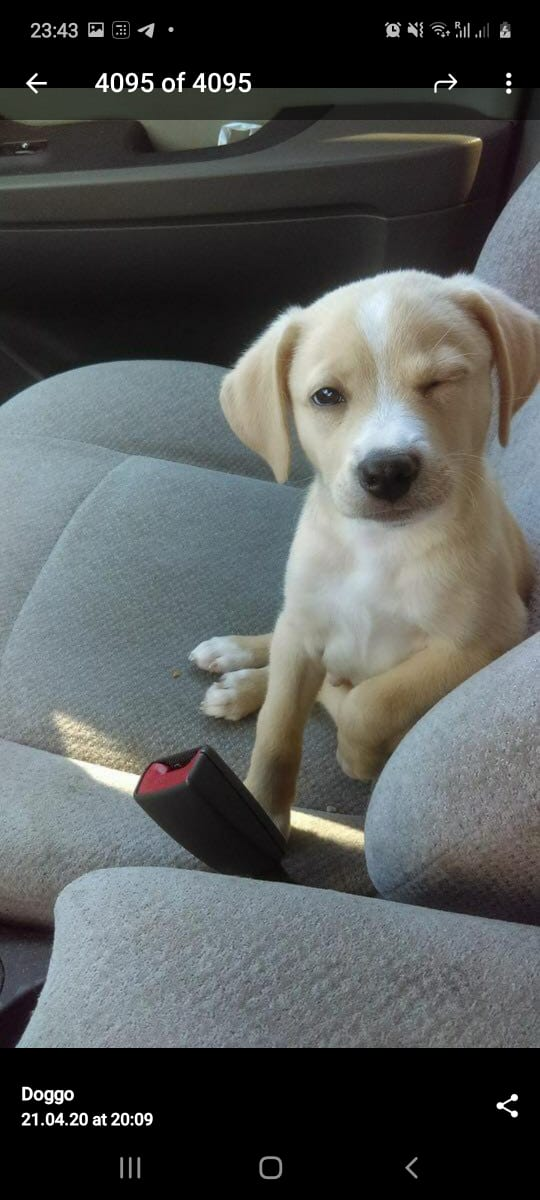

In [0]:
Image(my_image[0])

In [0]:

my_data = create_data_batches(my_image, test_data = True)

Test batches....


In [0]:
# Make prediction
my_preds = full_model.predict(my_data)
my_preds.shape

(1, 120)

In [0]:
my_pred_labels = [get_pred_label(my_preds[i]) for i in range(len(my_preds))]
my_pred_labels

['golden_retriever']

In [0]:
# Unbatch it, we couldn't use unbatchify bcoz we have no labels
custom_images = []
for images in my_data.unbatch().as_numpy_iterator():
  custom_images.append(images)

'custom_images = []\nfor images in my_data.unbatch().as_numpy_iterator():\n  custom_images.append(images)'

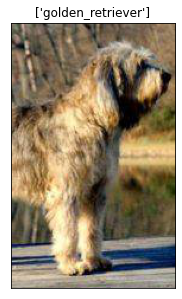

In [0]:
plt.figure(figsize = (10, 10))
for  image in custom_images:
  plt.subplot(1, 3, 1)
  plt.title(my_pred_labels)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image)